# ML no supervisado
Este notebook contiene el código para el curos de "ML no supervisado en Python". Las librerias que se han usado son

```
pandas==1.1.5
plotnine==0.8.0
scikit-learn==0.24.2
```

Los datos utilizados son de Tweets descargados durante unos dias en agosto. Se pueden descargar [aquí](DATA).

Generalmente se cargaran as librerias cuando se utilicen. Esto no es necesariamente la mejor practica en general, pero lo hacemos asi para que sea más claro de donde vienen ciertas funciones.

In [1]:
import pandas as pd
import plotnine as pn

data_location = 'tweet_and_user_data.csv'

pd.options.display.max_columns = 500

In [2]:
tweet_data = pd.read_csv(data_location)

/home/andreas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.


In [3]:
tweet_data.shape

(40581, 56)

In [4]:
tweet_data.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
0,1425590913959612419,1425590913959612419,1.628722e+12,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],409486555,409486555,MichelleObama,Michelle Obama,4,0,https://twitter.com/MichelleObama/status/14255...,[],[],0,NaN,True,0,0,232,0,None,NaN,NaN,NaN,1.047165e+18,We're so proud of the four organizations in ou...,1.425590e+18,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN,409486555,Michelle Obama,MichelleObama,Girl from the South Side and former First Lady...,https://t.co/HPYP9ad13Y,2011-11-10 20:13:01 UTC,2011-11-10,20:13:01 UTC,1770,"Washington, DC",16,20854298,184,461,False,True,https://pbs.twimg.com/profile_images/136674780...,https://pbs.twimg.com/profile_banners/40948655...
1,1427736867739299841,1427736867739299841,1.629234e+12,2021-08-17 22:59:29,200,NaN,Some casual suggestions to 😏SLIDE😏 into when u...,en,"['shoesdaytuesday', 'afterskewlslide']",[],21447363,21447363,katyperry,KATY PERRY,2,22,https://twitter.com/katyperry/status/142773686...,[],['https://pbs.twimg.com/media/E9BXG4YVkAAl3_A....,1,https://pbs.twimg.com/media/E9BXG4YVkAAl3_A.jpg,False,5266,368,408,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
2,1427667300488937476,1427667300488937476,1.629217e+12,2021-08-17 18:23:03,200,NaN,RT @ValaAfshar: You are not your job.,en,[],[],21447363,21447363,katyperry,KATY PERRY,2,18,https://twitter.com/katyperry/status/142766730...,[],[],0,NaN,True,0,0,764,0,None,NaN,NaN,NaN,2.597252e+08,You are not your job.,1.427648e+18,[],2021-08-17 17:05:53 CEST,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
3,1427667012105371652,1427667012105371652,1.629217e+12,2021-08-17 18:21:55,200,NaN,What have we become 😔😂 Toddler Cites Freedom ...,en,[],[],21447363,21447363,katyperry,KATY PERRY,2,18,https://twitter.com/katyperry/status/142766701...,['https://www.theonion.com/toddler-cites-freed...,[],0,NaN,False,5638,476,438,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
4,1427497703596990467,1427497703596990467,1.629177e+12,2021-08-17 07:09:08,200,NaN,The tech giants that refuse to massively addre...,en,[],[],21447363,21447363,katyperry,KATY PERRY,2,7,https://twitter.com/katyperry/status/142749770...,[],[],0,NaN,False,8810,546,1211,https://twitter.com/VICENews/status/1427311204...,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...


In [5]:
unique = ['id', 'conversation_id', 'retweet_id']
avg = ['nlikes', 'nreplies', 'nretweets']

gby = ['id_user', 'username_user', 'join_date', 'following', 'followers', 'likes', 'media', 'location', 'verified']

agg = {col : 'nunique' if col in unique else 'mean' for col in unique + avg}

tweet_data['location'] = tweet_data.location.fillna('')

user_stats = tweet_data.groupby(gby).agg(agg).reset_index()

In [6]:
user_stats.head()

,id_user,username_user,join_date,following,followers,likes,media,location,verified,id,conversation_id,retweet_id,nlikes,nreplies,nretweets
0,12,jack,2006-03-21,4406,5656510,35242,2836,,True,74,48,18,1699.081081,155.418919,574.175676
1,13,biz,2006-03-21,1596,2669130,7152,911,"San Francisco, CA",True,7,5,1,13.000000,1.714286,1.714286
2,428333,cnnbrk,2007-01-02,119,61197525,27,17019,Everywhere,True,66,65,1,1631.545455,417.424242,424.303030
3,717313,arstechnica,2007-01-28,1330,1147218,8425,6238,NYC - Boston - Chicago - SF,True,111,111,11,22.675676,1.702703,10.153153
4,742143,BBCWorld,2007-02-01,18,32526661,13,25403,"London, UK",True,441,436,65,734.868481,103.995465,296.519274


In [7]:
user_stats.shape, user_stats.id_user.nunique()

((847, 15), 847)

No es necesario hacer una gran introducción a los datos ya que no es nuestro foco, pero para resumir:

* Tenemos X Tweets de unas cuentas famosas de Twitter
* Las variables son informacion estandar que nos facilita Twitter
* También incluimos información sobre las cuentas en si, también con datos facilitados por el API de Twitter

También al final creamos un conjunto de datos con agregaciones a nivel de usuario. Hacemos esto para generar unos datos nuevos para analizar despues.

## Clustering: Kmeans
Antes de todo, haremos una introducción a lo basico de sklearn que vamos a estar utilizando durante todo el notebook.

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X_variables = ['followers', 'following', 'likes', 'media']

In [9]:
model = KMeans(n_clusters=5, random_state=0)
model.fit(user_stats[X_variables])
user_stats['predictions_kmeans'] = model.predict(user_stats[X_variables])

user_stats.predictions_kmeans.value_counts()

0    618
2    169
4     36
1     20
3      4
Name: predictions_kmeans, dtype: int64

In [10]:
model = PCA(2, random_state=0)
model.fit(user_stats[X_variables]);

In [11]:
pd.DataFrame(model.transform(user_stats[X_variables]))

,0,1
0,-3.227589e+06,-7197.074771
1,-6.214967e+06,-8804.975255
2,5.231342e+07,-35098.140138
3,-7.736879e+06,-8411.997256
4,2.364256e+07,-23018.315158
...,...,...
842,-8.863191e+06,-8629.744132
843,-3.251987e+06,-11669.522991
844,4.301823e+06,-14867.544308
845,-5.690061e+06,-10636.000104


### Kmeans en mas profundidad

In [12]:
from sklearn.cluster import KMeans, MiniBatchKMeans

In [13]:
model_3 = KMeans(n_clusters=3, random_state=0)
model_3.fit(user_stats[X_variables])
user_stats['predictions_kmeans_3'] = model_3.predict(user_stats[X_variables])

user_stats.predictions_kmeans_3.value_counts()

0    785
2     51
1     11
Name: predictions_kmeans_3, dtype: int64

In [14]:
model_10 = KMeans(n_clusters=10, random_state=0)
model_10.fit(user_stats[X_variables])
user_stats['predictions_kmeans_10'] = model_10.predict(user_stats[X_variables])

user_stats.predictions_kmeans_10.value_counts()

2    335
6    175
8    151
0     82
7     43
9     20
5     17
1     14
3      7
4      3
Name: predictions_kmeans_10, dtype: int64

Nos permite sklearn ver donde estan los centroides

In [15]:
pd.DataFrame(model_3.cluster_centers_, columns=X_variables)

,followers,following,likes,media
0,5.808735e+06,12550.436943,8038.670064,7278.182166
1,8.820971e+07,98593.818182,6443.363636,4792.909091
2,3.911104e+07,1848.549020,2250.098039,14051.294118


In [16]:
pd.DataFrame(model_10.cluster_centers_, columns=X_variables)

,followers,following,likes,media
0,1.288341e+07,6959.084337,8838.759036,4229.289157
1,5.455245e+07,1087.285714,4605.071429,22738.071429
2,4.065838e+06,6580.238806,9064.191045,6129.005970
3,7.895015e+07,29371.142857,8067.857143,6354.000000
4,1.175520e+08,292618.666667,4198.333333,2412.666667
5,2.803872e+07,3634.529412,1450.823529,7484.352941
6,1.025803e+06,37232.600000,8480.154286,9986.314286
7,1.878793e+07,1496.162791,3642.837209,12313.790698
8,7.760572e+06,3272.240000,6005.906667,6901.360000
9,3.981329e+07,878.900000,1305.350000,13443.900000


Podemos tambien evaluar como ha ido el entrenamiento, mirando el numero de iteraciones y la "inertia" (suma de distancias cuadradas a los centroides)

In [17]:
model_10.n_iter_

4

In [18]:
model_10.inertia_

2383521887884549.5

Si queremos que vaya mas rapido el entrenamiento podemos reducir el número maximo de iteraciones - pero subira la inertia (la calidad del "fit")

In [20]:
model_10_max_iter = KMeans(n_clusters=10, max_iter=2, random_state=0)
model_10_max_iter.fit(user_stats[X_variables])

model_10_max_iter.n_iter_

2

In [21]:
model_10_max_iter.inertia_

2386050047670964.5

Para velocidad también podemos aprovechar de la implementación de "mini batch" que coge un número reducido de puntos para el algoritmo (aqui no tiene mucho sentido usarlo!)

In [22]:
model = MiniBatchKMeans(n_clusters=10, batch_size=100, random_state=0)
model.fit(user_stats[X_variables])
user_stats['predictions_kmeans_minibatch'] = model.predict(user_stats[X_variables])

user_stats.predictions_kmeans_minibatch.value_counts()

0    261
5    178
9    124
7     98
2     74
8     51
6     25
4     17
1     15
3      4
Name: predictions_kmeans_minibatch, dtype: int64

Podemos también visualizar la distancia de cada punto a cada cluster

In [23]:
pd.DataFrame(model_3.transform(user_stats[X_variables]))

,0,1,2
0,1.549143e+05,8.255325e+07,3.345455e+07
1,3.139630e+06,8.554063e+07,3.644191e+07
2,5.538879e+07,2.701236e+07,2.208649e+07
3,4.661530e+06,8.706254e+07,3.796382e+07
4,2.671794e+07,5.568314e+07,6.584389e+06
...,...,...,...
842,5.787848e+06,8.818885e+07,3.909014e+07
843,1.773794e+05,8.257765e+07,3.347893e+07
844,7.377205e+06,7.502385e+07,2.592512e+07
845,2.614750e+06,8.501573e+07,3.591701e+07


### Visualizando
Visualizar los clusters es muy útil y muy facil!

In [24]:
user_stats['predictions_kmeans_3'] = user_stats.predictions_kmeans_3.astype(str)

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


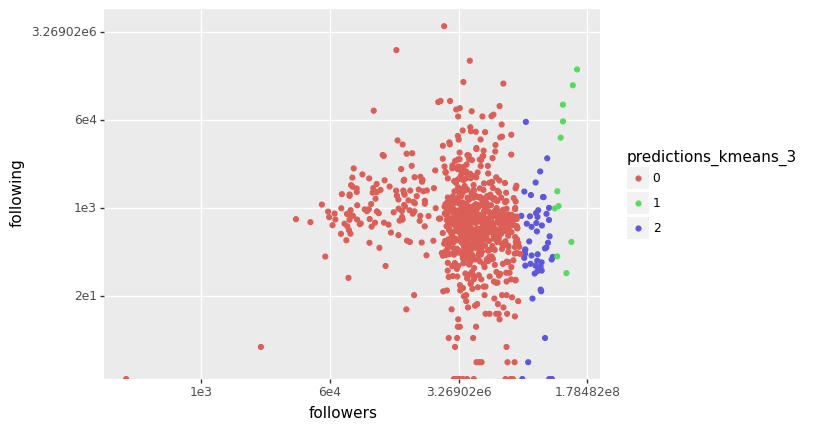

In [25]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='following', color='predictions_kmeans_3'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

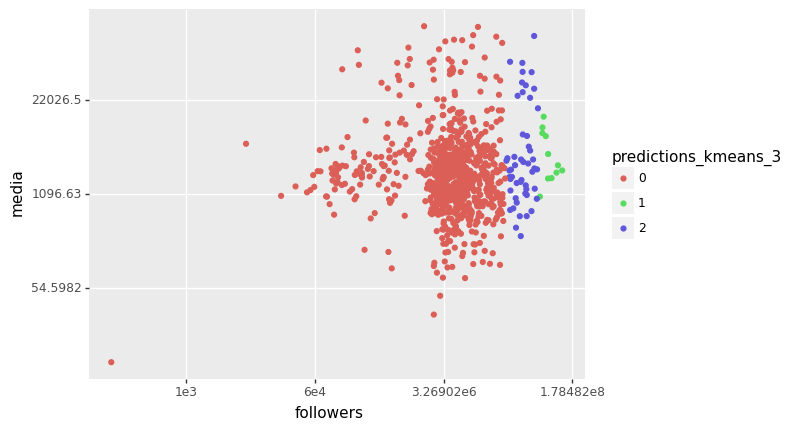

In [26]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='media', color='predictions_kmeans_3'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


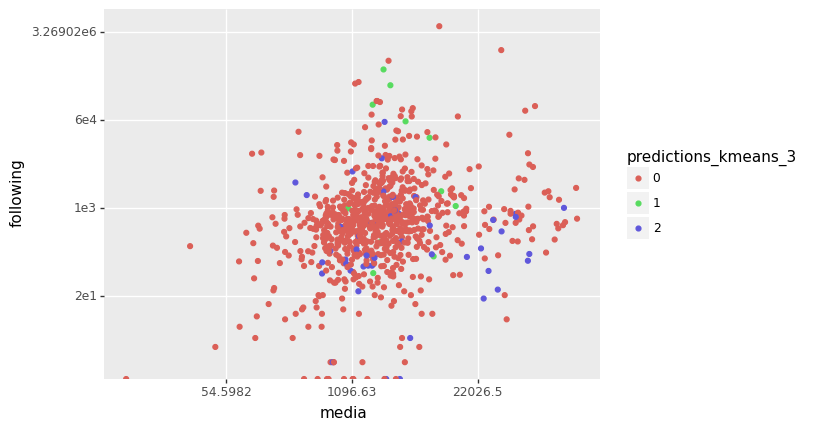

In [27]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='media', y='following', color='predictions_kmeans_3'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

Vemos que nuestros clusters agrupan principalmente por el numero de follows - hay un buen motivo por esto que veremos despues!

In [28]:
user_stats['predictions_kmeans_10'] = user_stats.predictions_kmeans_10.astype(str)

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


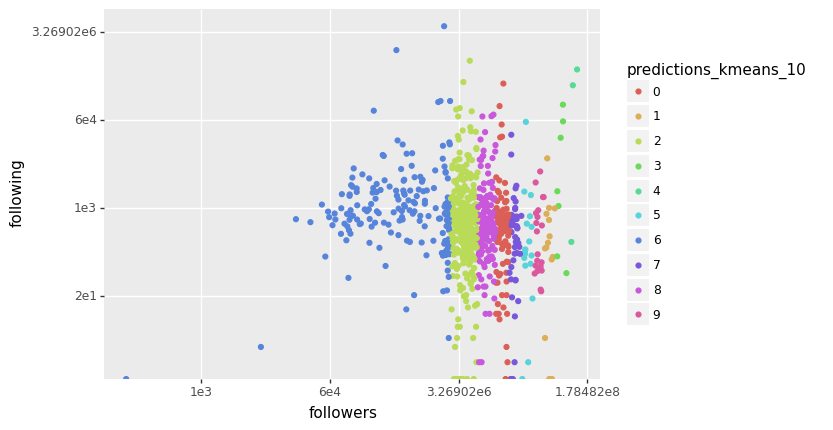

In [29]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='following', color='predictions_kmeans_10'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

Con 10 clusters vemos algo muy similar, pero los clusters más a la derecha

### Evaluando: metricas y el metodo del codo
Para evaluar el resultado de unos clusters hay muchas maneras. Vamos a revisar algunas de las metricas tipicas. Nota que muchas metricas dependen de unas eqtiquetas "verdaderas" - vamos a ignorar estas ya que estamos tratando de un problema totalmente no supervisado.

In [30]:
from sklearn import metrics

El mismo `KMeans` nos facilita el score de `inertia` que es la media de distancia de los puntos a su cluster

In [31]:
model_3.inertia_

2.782169661908321e+16

El problema aquí es que es muy dificil interpretar este valor en distintos contextos. Este número es alto o bajo? No se sabe porque depende de las mismas variables que se utilizaron en el modelo. Por esto existen otras metricas mejor.

El Silhouette score mide la diferencia entre la distancia a otros clusters comparado con el cluster del punto. Cuando mas cerca a 1, mejor!

In [32]:
metrics.silhouette_score(user_stats[X_variables], user_stats.predictions_kmeans_3)

0.8113295738687619

In [33]:
metrics.silhouette_score(user_stats[X_variables], user_stats.predictions_kmeans_10)

0.547364544099621

Esto nos facilita mucho ya que es un valor estandar.

El caliniski Harbasz score es similar y calcula el ratio de "dispersion" dentro a la dispersion fuera del cluster - donde la dispersion es la suma de distancias cuadradas.

In [34]:
metrics.calinski_harabasz_score(user_stats[X_variables], user_stats.predictions_kmeans_3)

1869.3012750406879

In [35]:
metrics.calinski_harabasz_score(user_stats[X_variables], user_stats.predictions_kmeans_10)

5801.401004197372

Realmente debe ser normalizado entre ejemplos ya que es un ratio, a diferencia del Silhouette score tiene un rango mayor.

El Davies Bouldin index es ligeramente diferente y calcula el ratio de la distancia entre clusters a la dispersion de estos clusters. Preferimos tener clusters muy alejados y poco dispersos. El score minimo es 0.

In [36]:
metrics.davies_bouldin_score(user_stats[X_variables], user_stats.predictions_kmeans_3)

0.47633098928627665

In [37]:
metrics.davies_bouldin_score(user_stats[X_variables], user_stats.predictions_kmeans_10)

0.4791233316193654

Entonces vemos que tenemos resultados diferentes para nuestras metricas - esto es porque cada uno mide algo ligeramente diferente. No hay uno que es mejor ni peor - depende de lo que buscas.

Para determinar el número optimo de clusters, es muy comun utilizar el metodo del codo:

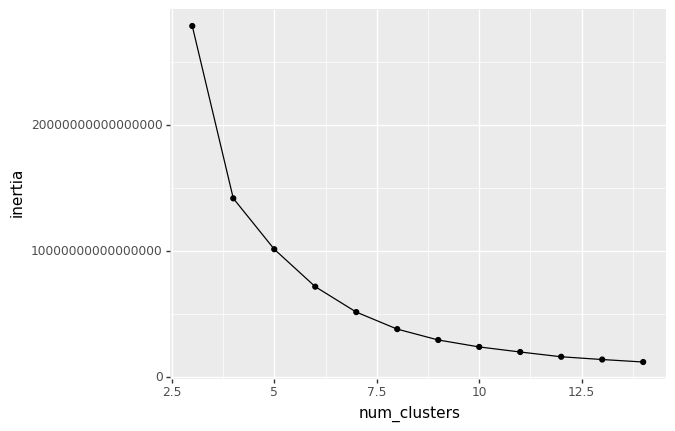

In [38]:
results = []
for n_clusters in range(3, 15):
    model = KMeans(n_clusters=n_clusters, random_state=0)
    model.fit(user_stats[X_variables])
    results.append({'num_clusters' : n_clusters, 'inertia' : model.inertia_})
    
results = pd.DataFrame(results)

graph = pn.ggplot(results, pn.aes(x='num_clusters', y='inertia')) + pn.geom_point() + pn.geom_line()
graph.draw();

Vemos que la diferencia entre inertias va reduciendo poco a poco.

## Clustering: preparando los datos
Los requisitos basicos es tener un conjunto de datos con variables númericas y con KMeans preferimos mucho utilizar variables continuas, sin muchos outliers y sin nulos.

In [39]:
X_variables = ['followers', 'following', 'likes', 'media', 'join_date']

In [40]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(user_stats[X_variables])
predictions = model.predict(user_stats[X_variables])

user_stats.predictions_kmeans_3.value_counts()

ValueError: could not convert string to float: '2006-03-21'

Si incluimos variables no numericas producimos un error! Para evitar esto tenemos que transformar el campo - en este caso tenemos la fecha de creacion de la cuenta - vamos a convertir esto en un número de dias.

In [41]:
user_stats['num_days_created'] = (pd.to_datetime('2022-01-01') - pd.to_datetime(user_stats.join_date)).dt.days

In [42]:
user_stats.num_days_created.describe()

count     847.000000
mean     4422.446281
std       622.065810
min       194.000000
25%      4217.500000
50%      4560.000000
75%      4705.500000
max      5765.000000
Name: num_days_created, dtype: float64

In [43]:
X_variables = ['followers', 'following', 'likes', 'media', 'num_days_created']

In [44]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(user_stats[X_variables])
pd.DataFrame(model.predict(user_stats[X_variables])).value_counts()


0    785
1     51
2     11
dtype: int64

Ahora si que funciona!

### El pipeline
Hay muchas cosas que podemos hacer para preparar los datos y el `Pipeline` es fundamental para incorporar todo de la mejor forma.

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
X_variables = ['followers', 'following', 'likes', 'media', 'num_days_created']

kmeans_pipeline = Pipeline(
    [
        ('cluster', KMeans(n_clusters=5, random_state=0))
    ]
)

kmeans_pipeline.fit(user_stats[X_variables])
predictions = kmeans_pipeline.predict(user_stats[X_variables])
pd.DataFrame(predictions).value_counts()

0    618
2    169
4     36
1     20
3      4
dtype: int64

In [47]:
metrics.silhouette_score(user_stats[X_variables], predictions)

0.6650253941017441

Tenemos exactamente el mismo resultado pero ahora con este `Pipeline` - vamos a ver porque es tan util muy pronto.

### Eligiendo las variables
Antes de construir el flujo completo vamos a ver como podemos elegir variables. Buscamos en general variables continuas sin muchos "problemas.

In [48]:
potential_variables = [col for col in user_stats if user_stats[col].dtypes in [int, float, bool] and col not in ['id_user']]

In [49]:
user_stats[potential_variables].describe()

,following,followers,likes,media,id,conversation_id,retweet_id,nlikes,nreplies,nretweets,num_days_created
count,8.470000e+02,8.470000e+02,847.000000,847.000000,847.000000,847.000000,847.000000,8.470000e+02,847.000000,847.000000,847.000000
mean,1.302350e+04,8.884093e+06,7669.407320,7653.731995,47.911452,44.040142,7.257379,7.907931e+03,387.972089,1398.517748,4422.446281
std,1.579093e+05,1.336164e+07,27268.416721,22608.045108,128.928033,119.654431,20.324725,6.969749e+04,4153.549018,17738.008372,622.065810
min,0.000000e+00,1.070000e+02,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,194.000000
25%,2.000000e+02,2.854442e+06,249.500000,984.500000,3.000000,3.000000,0.000000,9.857193e+01,7.768319,21.750000,4217.500000
50%,6.060000e+02,4.787665e+06,1349.000000,2067.000000,9.000000,8.000000,1.000000,5.157097e+02,31.950000,96.000000,4560.000000
75%,1.469000e+03,9.252669e+06,5732.000000,3929.500000,29.000000,26.000000,5.000000,2.669773e+03,105.176471,460.209459,4705.500000
max,4.200793e+06,1.299093e+08,492144.000000,236024.000000,1412.000000,1158.000000,202.000000,1.899711e+06,88035.000000,505932.333333,5765.000000


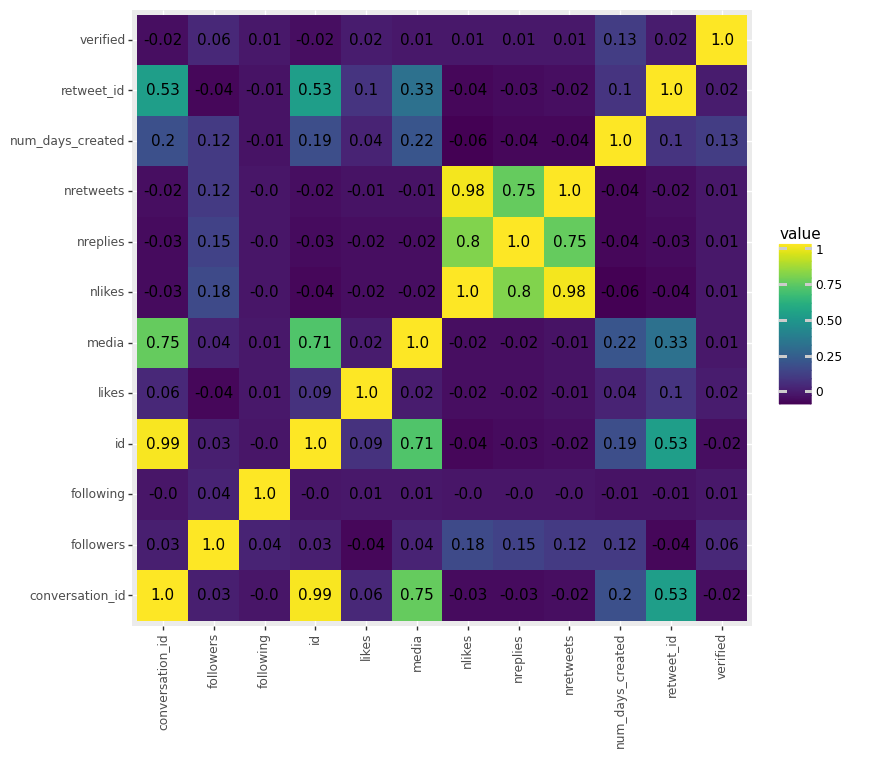

In [50]:
graph_data = pd.melt(user_stats[potential_variables].corr().round(2).reset_index(), 'index')
graph = (
    pn.ggplot(graph_data, pn.aes(x='index', y='variable', fill='value', label='value'))
    + pn.geom_tile()
    + pn.geom_text()
    + pn.theme(figure_size=(8, 8), axis_text_x=pn.element_text(angle=90))
    + pn.xlab('') + pn.ylab('')
)

graph.draw();


A primeras podemos utilizar nuestra tabla y el plot de correlaciones para entender que variables mejor cuadran con lo que buscamos.

Vemos por ejemplo:

* Following tiene mucha separación entre los valores maximos y minimos
* El número de tweets (columna `id`) tiene muchos outliers
* Las columnas de numero de likes, replies y retweets son altamente correlacionadas

### Normalización y construyendo un pipeline real
Ahora que tenemos un poco más claro los diferentes aspectos de la preparación de datos. Miramos primero cómo normalizar para aprender el sintaxis de sklearn y luego miramos el pipeline completo.

In [51]:
from sklearn import preprocessing

In [52]:
variables = ['followers', 'num_days_created']

print('Como se distribuye antes:')
print(user_stats[variables].describe().round())
print('\n\n')

follower_scaler = preprocessing.StandardScaler()
follower_scaler.fit(user_stats[variables])

print('Ahora se distribuye:')
print(pd.DataFrame(follower_scaler.transform(user_stats[variables])).describe().round())

Como se distribuye antes:
         followers  num_days_created
count        847.0             847.0
mean     8884093.0            4422.0
std     13361636.0             622.0
min          107.0             194.0
25%      2854442.0            4218.0
50%      4787665.0            4560.0
75%      9252669.0            4706.0
max    129909278.0            5765.0



Ahora se distribuye:
           0      1
count  847.0  847.0
mean    -0.0   -0.0
std      1.0    1.0
min     -1.0   -7.0
25%     -0.0   -0.0
50%     -0.0    0.0
75%      0.0    0.0
max      9.0    2.0


Esto es muy importante para `KMeans` porque explota la distancia entre puntos y si las variables tienen dimensiones diferentes, las distancias no son comparables!

In [53]:
X_variables = ['followers', 'following', 'likes', 'media', 'num_days_created']

kmeans_pipeline = Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('cluster', KMeans(n_clusters=5, random_state=0))
    ]
)

kmeans_pipeline.fit(user_stats[X_variables])
predictions = kmeans_pipeline.predict(user_stats[X_variables])
pd.DataFrame(predictions).value_counts()

0    757
1     49
3     34
2      6
4      1
dtype: int64

In [54]:
metrics.silhouette_score(kmeans_pipeline['scaler'].transform(user_stats[X_variables]), predictions)

0.6168923156733483

Mucho cuidado! Si no aplicamos la transformación el score es erroneo. Vemos que el Silhouette score es ligeramente peor, miramos también las visualizaciones...

In [55]:
user_stats['predictions_kmeans_5_scaler'] = predictions.astype(str)

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


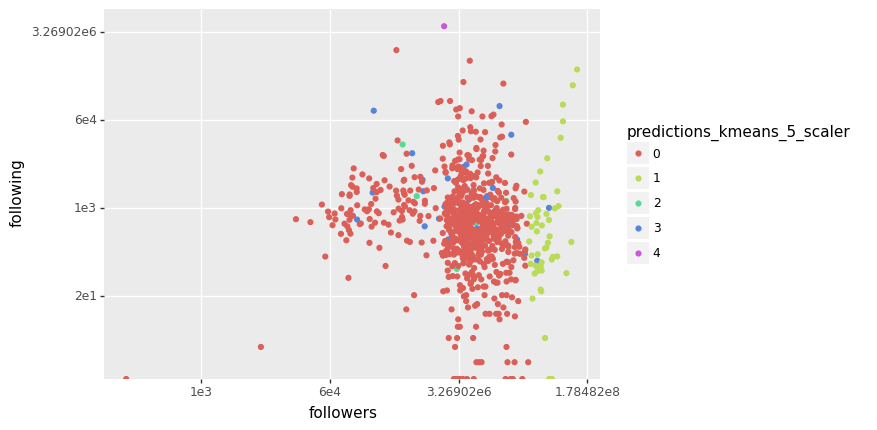

In [56]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='following', color='predictions_kmeans_5_scaler'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

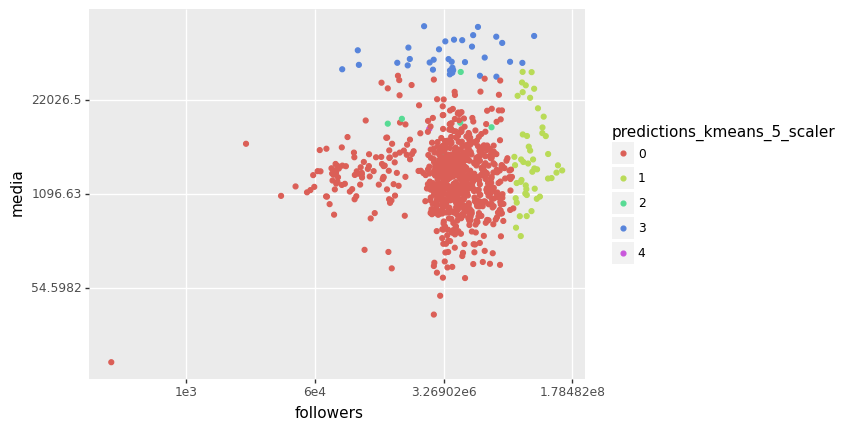

In [57]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='media', color='predictions_kmeans_5_scaler'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


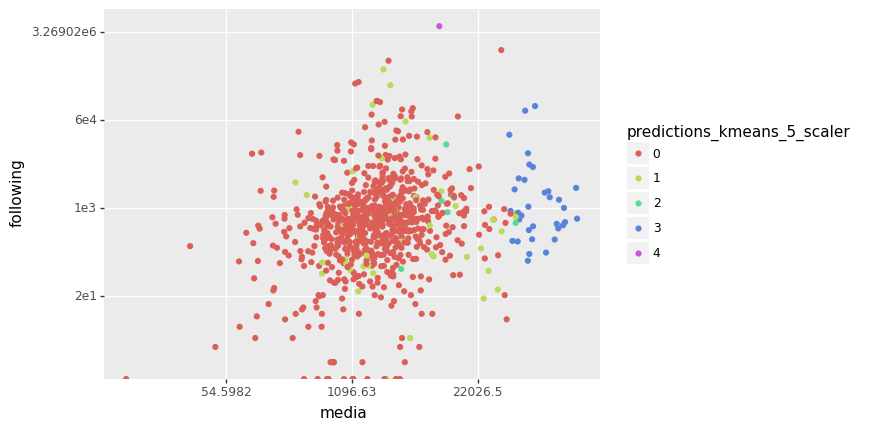

In [58]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='media', y='following', color='predictions_kmeans_5_scaler'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

Ahora vemos que los clusters empiezan a tomar distintas formas por otras variables, no solo el followers. Apreciamos que desde distintos puntos de vista la separación es diferente. Esto es muy importante porque antes nuestros resutados no eran realmente interesantes - simplemente dividiamos por una variable y ya esta!

Entonces vemos que el scaler nos permite mejorar estos resultados y como el pipeline lo facilita.

## Clustering: otras tecnicas

### DBScan
Vamos a probar el DBScan en una forma muy similar para comparar los resultados.

In [59]:
from sklearn.cluster import DBSCAN

In [74]:
X_variables = ['followers', 'following', 'likes', 'media', 'num_days_created']

dbscan_pipeline = Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('cluster', DBSCAN(0.8))
    ]
)

# Por algún motivo, no tiene metodo de predict - solo fit_predict
predictions = dbscan_pipeline.fit_predict(user_stats[X_variables])
pd.DataFrame(predictions).value_counts()

 0    761
-1     64
 1     22
dtype: int64

In [75]:
metrics.silhouette_score(dbscan_pipeline['scaler'].transform(user_stats[X_variables]), predictions)

0.5034866285582085

In [76]:
user_stats['predictions_dbscan_scaler'] = predictions.astype(str)

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


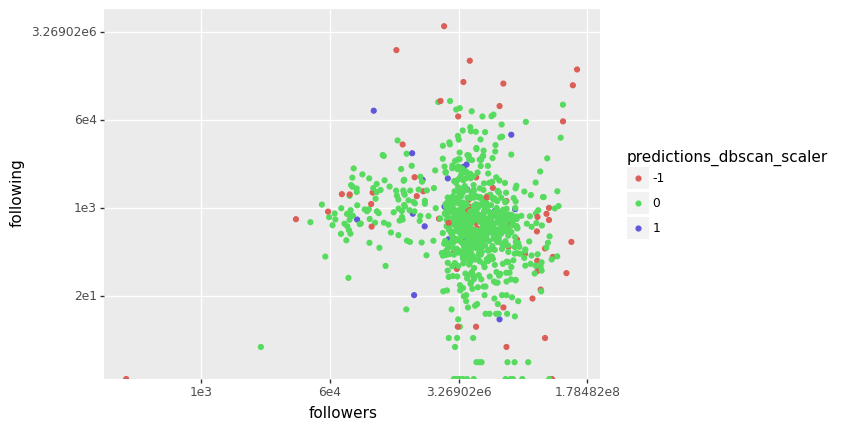

In [77]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='following', color='predictions_dbscan_scaler'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

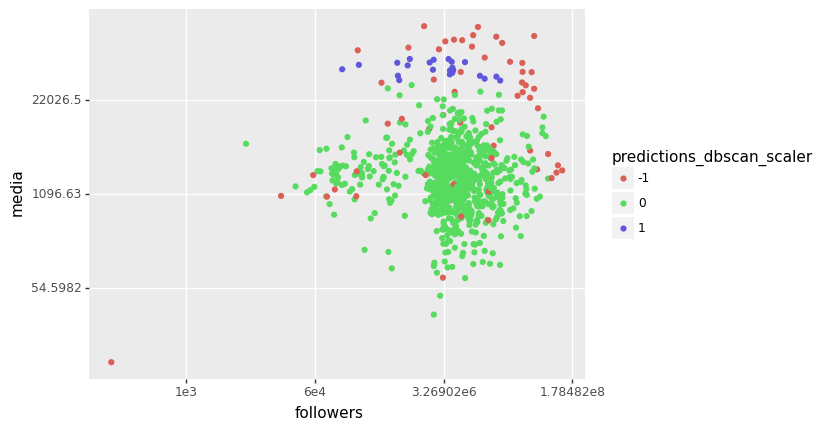

In [78]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='media', color='predictions_dbscan_scaler'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


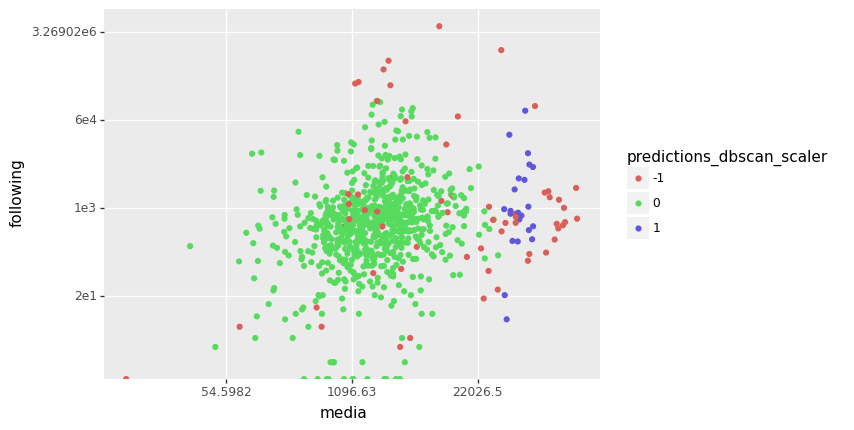

In [79]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='media', y='following', color='predictions_dbscan_scaler'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

La principal diferencia que vemos ahora es que tenemos un cluster "-1" que corresponde a los puntos que no estan dentro de ningún cluster. Luego tambien formamos una seria de 2 clusters. En el caso de DBSCAN los resultados parecen algo peores y teniamos que jugar un poco con el parametro principal - pero no hacia falta definir a priori un numero de clusters especifico.

El motivo detras de los resultados será que existe pocos clusters reales en los datos y KMeans simplemente crea clusters arbitrarios.

### Hierarchical clustering

In [80]:
from sklearn.cluster import AgglomerativeClustering

In [81]:
user_stats['has_retweets'] = user_stats.retweet_id > 0

In [82]:
X_variables = ['followers', 'following', 'likes', 'media', 'num_days_created', 'verified', 'has_retweets']

agg_pipeline = Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('cluster', AgglomerativeClustering(5))
    ]
)

# Por algún motivo, no tiene metodo de predict - solo fit_predict
predictions = agg_pipeline.fit_predict(user_stats[X_variables])
pd.DataFrame(predictions).value_counts()

0    411
2    383
1     39
4     13
3      1
dtype: int64

In [83]:
metrics.silhouette_score(agg_pipeline['scaler'].transform(user_stats[X_variables]), predictions)

0.39727967357288396

In [84]:
user_stats['predictions_agg_scaler'] = predictions.astype(str)

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


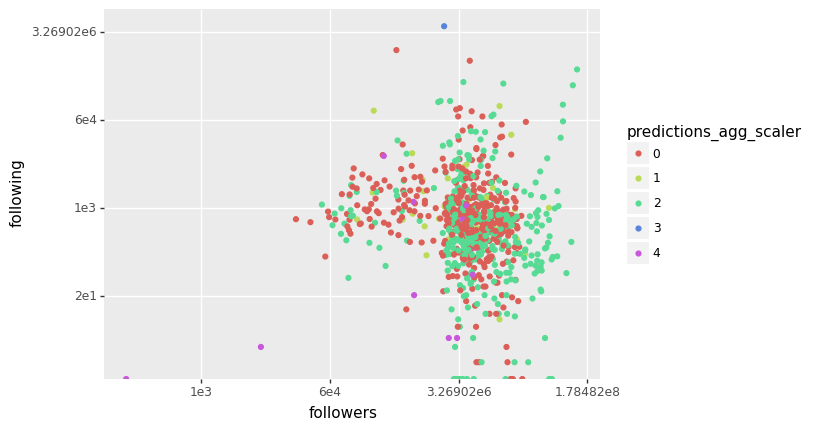

In [85]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='following', color='predictions_agg_scaler'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

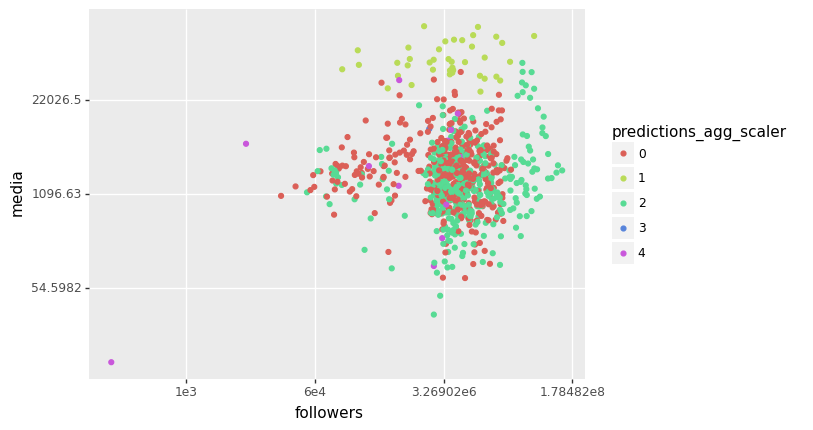

In [86]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='media', color='predictions_agg_scaler'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


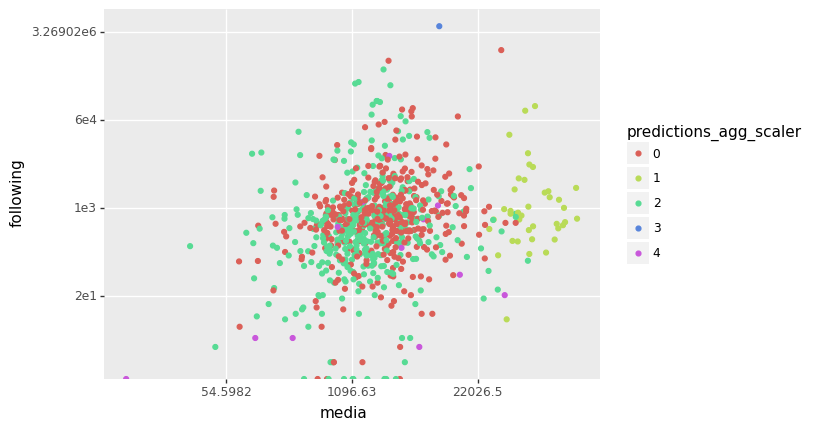

In [87]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='media', y='following', color='predictions_agg_scaler'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


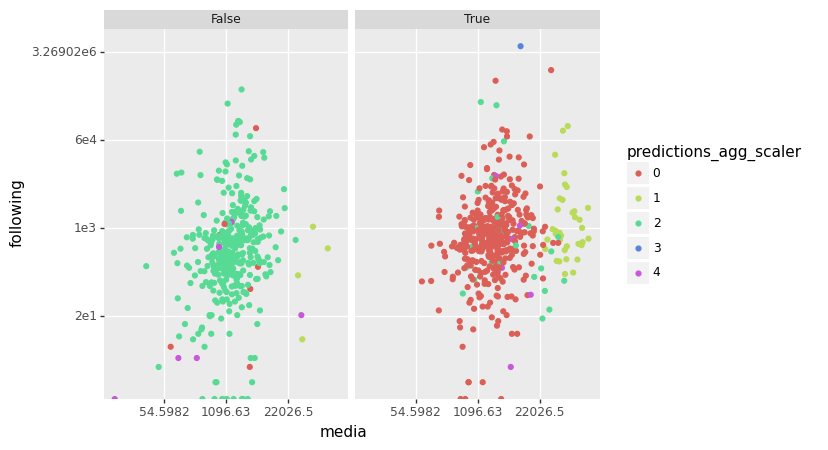

In [88]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='media', y='following', color='predictions_agg_scaler'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
    + pn.facet_wrap('~has_retweets')
)

graph.draw();

Estos resultados son muy similares a lo que vimos para KMeans - pero ahora vemos que con nuestras variables categoricas, somos capaces de diferenciar en otro eje también. En el último grafico por ejemplo, vemos que se han dividio varios clusters por el tener o no tener retweets.

Este modelo también tiene otras funcionalidades! Vamos a ver el dendogram cogiendo codigo de un ejemplo de scikit-learn

In [89]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

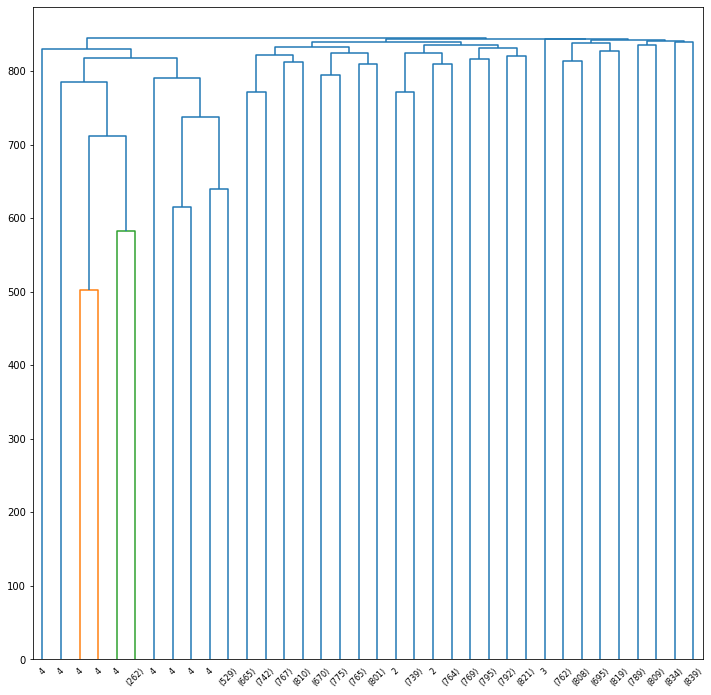

In [90]:
plt.figure(figsize=(12, 12))
plot_dendrogram(agg_pipeline['cluster'], labels=agg_pipeline['cluster'].labels_, truncate_mode='level', p=5)
plt.show()

## Clustering: casos de uso
Para qué se pueden utilizar los algoritmos de clustering? Vamos a detectar unos grupos de interes y también usarlo en un algoritmo predictivo.

In [91]:
cols = ['followers', 'nlikes', 'nreplies', 'nretweets']

In [92]:
user_stats.predictions_kmeans_5_scaler.value_counts()

0    757
1     49
3     34
2      6
4      1
Name: predictions_kmeans_5_scaler, dtype: int64

In [93]:
user_stats.groupby('predictions_kmeans_5_scaler')[cols].mean()

,followers,nlikes,nreplies,nretweets
predictions_kmeans_5_scaler,,,,
0,6.101331e+06,3869.552645,132.937625,589.634173
1,5.285796e+07,76363.969416,4627.622557,14986.403131
2,5.010318e+06,1520.804877,44.184751,255.554320
3,8.350838e+06,522.926469,28.142997,68.112995
4,2.088502e+06,27.338983,3.101695,8.542373


Cogiendo los clusters que sacamos de nuestro KMeans - podemos analizar los clusters por unas variables que antes no usamos. Cogemos la media de likes, respuestas y retweets que tenian de sus tweets en el periodo que analizamos.

Vemos claramente unos patrones interesantes. Parece ser que hay mucha diferencia entre los clusters y como la gente interactua con su contenido.

El cluster 0, por ejemplo, tiene menos followers (de media) que el 1, pero tiene casi los mismos likes. A la vez, tiene muchisimo menos replies y retweets.

También, comparando el 0 y el 3 - el 3 tiene más followers que el 0, pero mucho menos interacción.

Analizando de esta forma, esta claro que estamos descubriendo que existen unos patrones de interaccion según las otras caracteristicas.

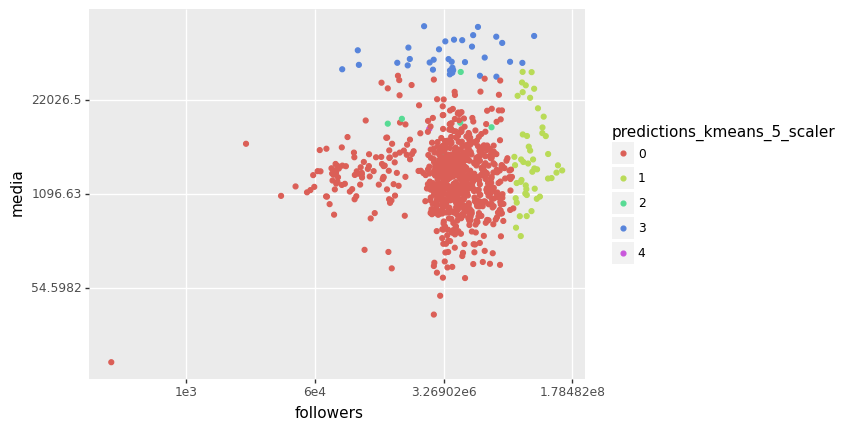

In [94]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='media', color='predictions_kmeans_5_scaler'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

Dibujando otra vez uno de los graficos de antes - vemos que la principal diferencia entre el 0, 1 y 2 son:

* Los 1 tienen mucho mas followers que lo habitual
* Los 2 tienen mucho mas "media" que lo habitual

Entonces esto ayuda a entener los patrones de antes - a lo mejor los 1 tienen tanta interacción porque tienen una base fiel de seguidores. Mientras puede ser que los 2 son más empresas de noticias etc. y entonces la gente no interactua tanto.

In [95]:
user_stats[user_stats.predictions_kmeans_5_scaler == '1'].username_user

2               cnnbrk
4             BBCWorld
6              Twitter
8              nytimes
9          BarackObama
18                espn
29         BBCBreaking
59             YouTube
63                NASA
81            ladygaga
99          realmadrid
113        jimmyfallon
120       TheEllenShow
171       narendramodi
203         wizkhalifa
216           ddlovato
223          katyperry
237          KingJames
238     KevinHart4real
239        selenagomez
263      KimKardashian
271       SportsCenter
277       justinbieber
290               Pink
307        akshaykumar
317    khloekardashian
331       ArianaGrande
334         aliciakeys
379           elonmusk
382            shakira
409          BillGates
481           imVkohli
505    Louis_Tomlinson
507                JLo
539          BrunoMars
540             iamsrk
547      NiallOfficial
569           iHrithik
574         LilTunechi
598    BeingSalmanKhan
601          sachin_rt
616         SrBachchan
632          Cristiano
637      Ke

In [96]:
user_stats[user_stats.predictions_kmeans_5_scaler == '3'].username_user

5                CNN
10        TechCrunch
12          mashable
15           FoxNews
16               MTV
19       FastCompany
20             MSNBC
21             enews
22          Newsweek
23           Gizmodo
33        BoingBoing
34      TheEconomist
40     PasteMagazine
43        lifehacker
45         YahooNews
49         TODAYshow
56          politico
64           TVGuide
71               io9
85          engadget
93      RollingStone
101          InStyle
104          CBSNews
107            Slate
117         USATODAY
128             ABC7
129          latimes
187     newscientist
199         usweekly
201     mental_floss
291              ABC
349       micheltelo
535      FCBarcelona
697      lopezdoriga
Name: username_user, dtype: object

Efectivamente es asi! Vemos que (salvo unos ejemplos, por ejemplo El Madrid vs. El Barca) en general los del 1 son personajes muy famosos mientras los del 2 son empresas y medios de comunicacion. 

### Utilizar los clusters con un modelo
Ahora, esto nos puede ayudar en predicir algo? Hacemos una regresion simple para predecir el número de likes de un tweet

In [97]:
from sklearn.linear_model import LinearRegression

X_variables = ['followers', 'video']
y_variable = 'nlikes'

In [98]:
model = LinearRegression()
model.fit(tweet_data[X_variables], tweet_data[y_variable])
model.score(tweet_data[X_variables], tweet_data[y_variable])

0.009980522620330223

In [99]:
cols_tweets = X_variables + ['id_user', y_variable]
cols_user = ['id_user', 'predictions_kmeans_5_scaler']
combined_data = tweet_data[cols_tweets].merge(user_stats[cols_user])

In [100]:
tweet_data.shape

(40581, 56)

In [101]:
combined_data.shape

(40581, 5)

In [102]:
model = LinearRegression()
model.fit(combined_data[X_variables], combined_data[y_variable])
model.score(combined_data[X_variables], combined_data[y_variable])

0.009980522620330223

In [103]:
model = LinearRegression()
model.fit(combined_data[X_variables + ['predictions_kmeans_5_scaler']], combined_data[y_variable])
model.score(combined_data[X_variables + ['predictions_kmeans_5_scaler']], combined_data[y_variable])

0.011607477446714642

El score es simplemente el R2 del modelo. Podemos ver que por utilizar nuestros clusters, hemos subido más de un punto! Es un ejemplo sencillo pero logramos la mejora y la alternativa habria sido clasificar a mano los nombres de usuarios.

## Reducción de dimensiones: los algoritmos
Intentamos visualizar nuestros datos de una forma más simple

### PCA

In [213]:
from sklearn.decomposition import PCA
variables = [col for col in user_stats if user_stats[col].dtypes in [int, float] and col not in ['id_user']]

In [214]:
user_stats[variables].head()

,following,followers,likes,media,id,conversation_id,retweet_id,nlikes,nreplies,nretweets,num_days_created
0,4406,5656510,35242,2836,74,48,18,1699.081081,155.418919,574.175676,5765
1,1596,2669130,7152,911,7,5,1,13.000000,1.714286,1.714286,5765
2,119,61197525,27,17019,66,65,1,1631.545455,417.424242,424.303030,5478
3,1330,1147218,8425,6238,111,111,11,22.675676,1.702703,10.153153,5452
4,18,32526661,13,25403,441,436,65,734.868481,103.995465,296.519274,5448


In [215]:
ncomponents = 2
pca_pipeline = Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('pca', PCA(ncomponents, random_state=0))
    ]
)

pca_pipeline.fit(user_stats[variables])

cols = ['component_' + str(i + 1) for i in range(ncomponents)]
transformed_data = pd.DataFrame(pca_pipeline.transform(user_stats[variables]), columns=cols)

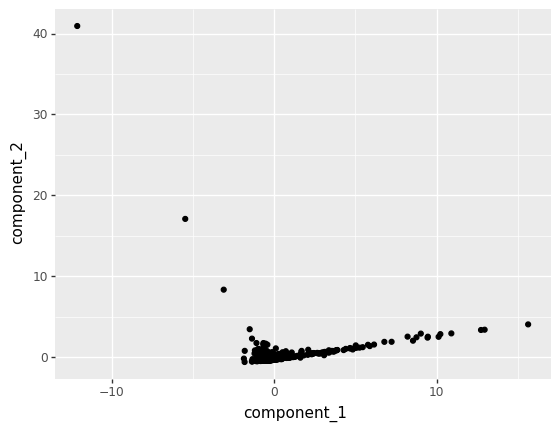

In [216]:
graph = (
    pn.ggplot(transformed_data, pn.aes(x='component_1', y='component_2'))
    + pn.geom_point()
)

graph.draw();

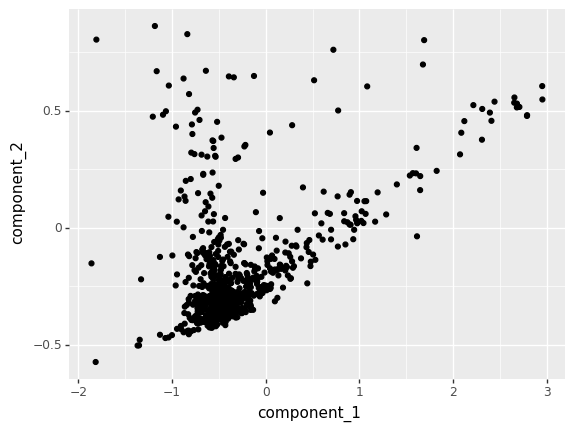

In [217]:
limit_x = transformed_data.component_1.quantile(0.95)
limit_y = transformed_data.component_2.quantile(0.95)

condition = (transformed_data.component_1 < limit_x) & (transformed_data.component_2 < limit_y)

graph = (
    pn.ggplot(transformed_data[condition], pn.aes(x='component_1', y='component_2'))
    + pn.geom_point()
)

graph.draw();

In [218]:
ncomponents = 3
pca_pipeline = Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('pca', PCA(ncomponents, random_state=0))
    ]
)

pca_pipeline.fit(user_stats[variables])

cols = ['component_' + str(i + 1) for i in range(ncomponents)]
transformed_data = pd.DataFrame(pca_pipeline.transform(user_stats[variables]), columns=cols)

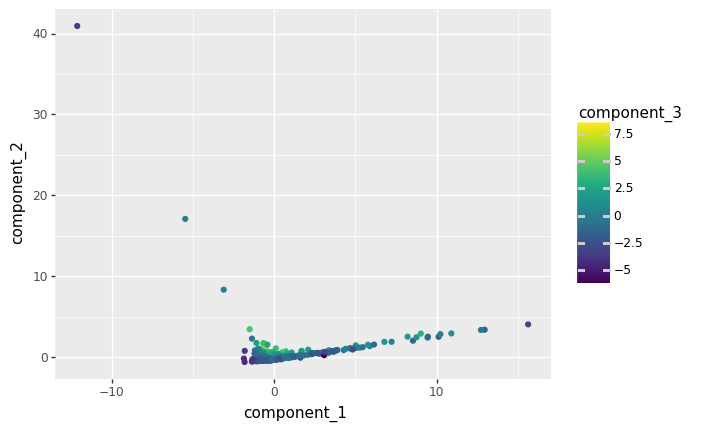

In [219]:
graph = (
    pn.ggplot(transformed_data, pn.aes(x='component_1', y='component_2', color='component_3'))
    + pn.geom_point()
)

graph.draw();

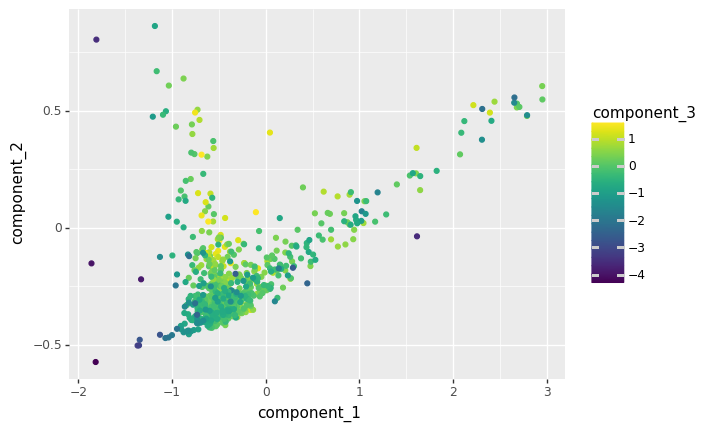

In [220]:
limit_x = transformed_data.component_1.quantile(0.95)
limit_y = transformed_data.component_2.quantile(0.95)
limit_z = transformed_data.component_3.quantile(0.95)

condition = (transformed_data.component_1 < limit_x) & (transformed_data.component_2 < limit_y) & (transformed_data.component_3 < limit_z)

graph = (
    pn.ggplot(transformed_data[condition], pn.aes(x='component_1', y='component_2', color='component_3'))
    + pn.geom_point()
)

graph.draw();

De primeras vemos que hemos conseguido visualizar bastante bien nuestros datos - antes era imposible y ahora vemos que por nuestros ejes principales somos capaces de resumir todo en un grafico.

También podemos dibujar el grafico del biplot - ahora usamos una libreria que se llama `PCA`para simplificar el codigo - pero el sintaxis es muy similar.

In [221]:
from pca import pca

In [222]:
model = pca(n_components=3)
scaler = preprocessing.StandardScaler()
results = model.fit_transform(scaler.fit_transform(user_stats[variables]))

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


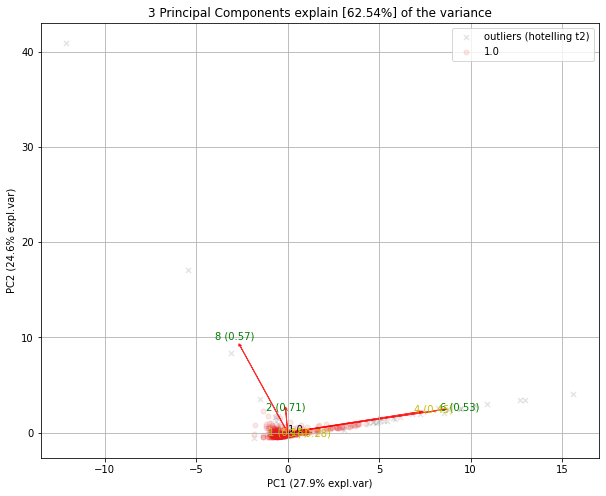

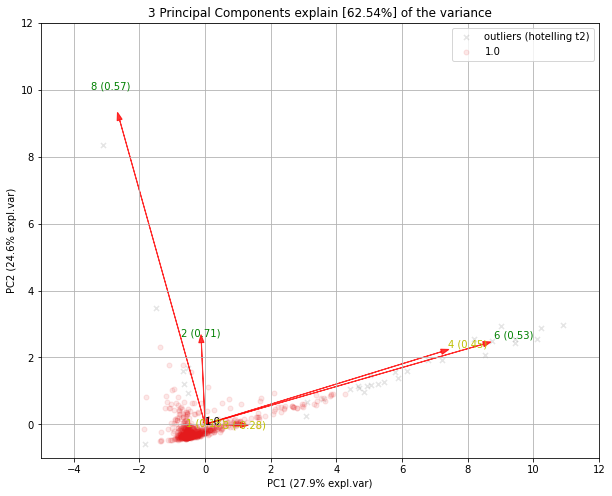

In [223]:
fig, ax = model.biplot(n_feat=6, alpha_transparency=0.1, hotellingt2=True)
ax.set_xlim([-5, 12])
ax.set_ylim([-1, 12])
fig

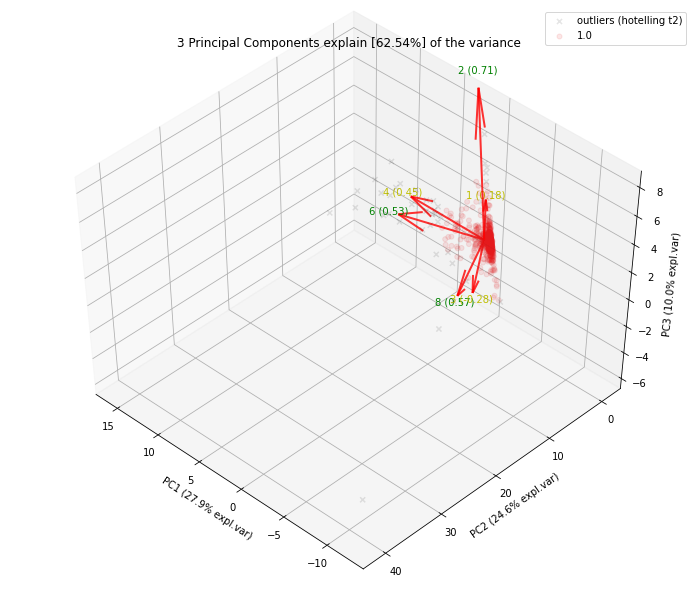

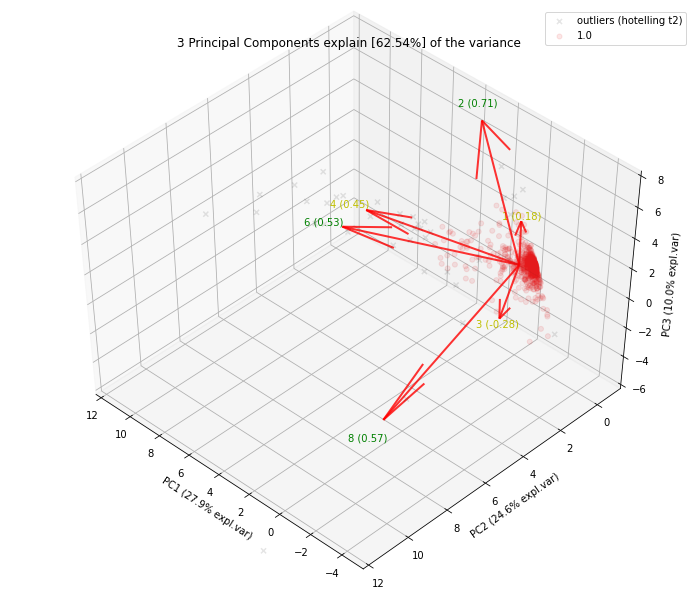

In [224]:
fig, ax = model.biplot(n_feat=6, alpha_transparency=0.1, hotellingt2=True, d3=True)
ax.set_xlim([-5, 12])
ax.set_ylim([-1, 12])
ax.set_zlim([-6, 8])
fig

In [226]:
nums = [2, 3, 4, 6, 8]
[(num, variables[num]) for num in nums]

[(2, 'likes'), (3, 'media'), (4, 'id'), (6, 'retweet_id'), (8, 'nreplies')]

El biplot es útil para ayudar en visualizar exactamente que está pasando cuando aplicamos el PCA. Apreciamos, por ejemplo, que el PC1 se determina en gran parte por el número de "retweets" y "tweets", mientras el PC2 por el número de respuestas de media que tienen los tweets del usuario ademas de la cantidad de "media".

Tanto en sklearn como PCA podemos especificar un porcentaje de varianza en vez de un número de componenentes

In [227]:
pca_pipeline = Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('pca', PCA(0.9))
    ]
)

pca_pipeline.fit(user_stats[variables])

transformed_data = pd.DataFrame(pca_pipeline.transform(user_stats[variables]))

In [228]:
transformed_data.head()

,0,1,2,3,4,5,6
0,0.696337,-0.049355,0.622472,0.672806,-1.602723,1.305346,0.693353
1,-0.162633,-0.350720,0.979593,-0.010939,-0.961727,1.776858,0.296746
2,0.515540,0.630544,3.880677,-0.065717,-0.842324,-1.464960,0.165299
3,0.933285,-0.048678,0.425700,-0.049928,-0.635455,1.372570,0.299126
4,5.021604,1.479695,1.367333,-0.240306,-0.197043,-0.727801,1.770982


Ahora tenemos 7 componentes, por ejemplo, para explicar 90% de la varianza. La varianza se puede ver en el mismo modelo:

In [229]:
pca_pipeline['pca'].explained_variance_ratio_.cumsum()

array([0.27927265, 0.52529364, 0.62544895, 0.7172159 , 0.80742716,
       0.88116646, 0.94267022])

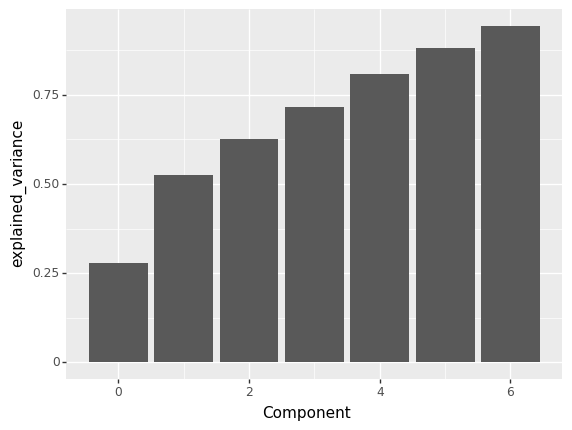

In [230]:
graph_data = pd.DataFrame(pca_pipeline['pca'].explained_variance_ratio_.cumsum(), columns=['explained_variance']).reset_index()

graph = pn.ggplot(graph_data, pn.aes(x='index', y='explained_variance')) + pn.geom_col() + pn.xlab('Component')
graph.draw();

Aquí vemos cuanta varianza se explica por cada componente adicional (hasta 90%). Ojo! Los primeros 3 componentes son iguales a nuestros componentes de antes!

### t-SNE

In [248]:
from sklearn.manifold import TSNE

In [249]:
ncomponents = 2
tsne_pipeline = Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('pca', PCA(random_state=0)),
        ('tsne', TSNE(ncomponents, random_state=0))
    ]
)

cols = ['component_' + str(i + 1) for i in range(ncomponents)]
transformed_data = pd.DataFrame(tsne_pipeline.fit_transform(user_stats[variables]), columns=cols)

In [250]:
transformed_data = pd.concat([transformed_data, user_stats[['id_user'] + variables]], axis=1)

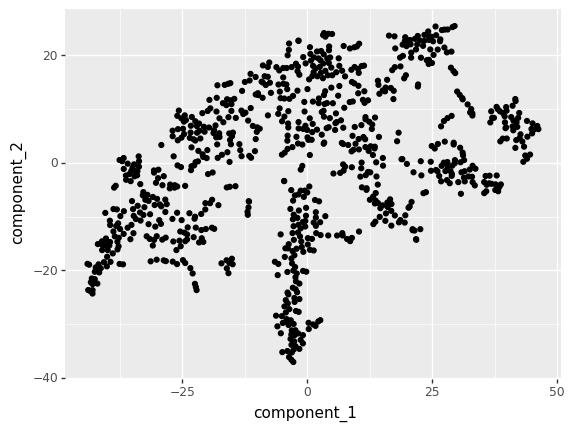

In [251]:
graph = (
    pn.ggplot(transformed_data, pn.aes(x='component_1', y='component_2'))
    + pn.geom_point()
)

graph.draw();

Vemos que los resultados ahora son muy diferentes! Es un poco dificil apreciar que exactamente quiere decir el resultado - asi que vamos a dibujar el grafico con colores que corresponden a las otras variables.

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


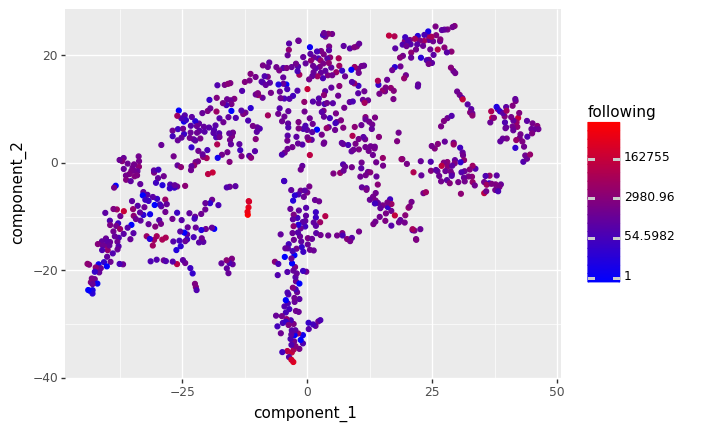

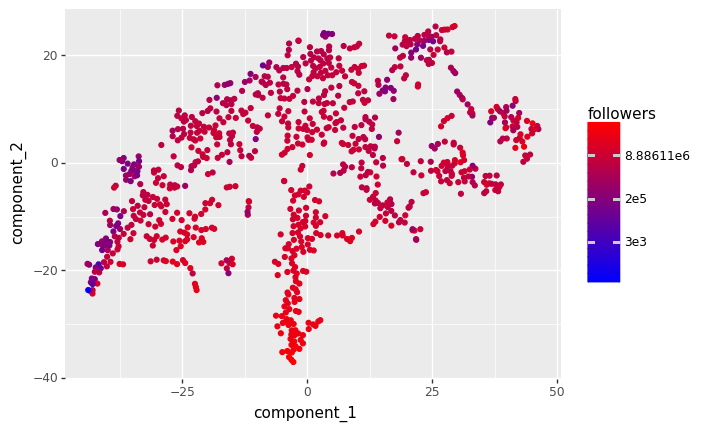

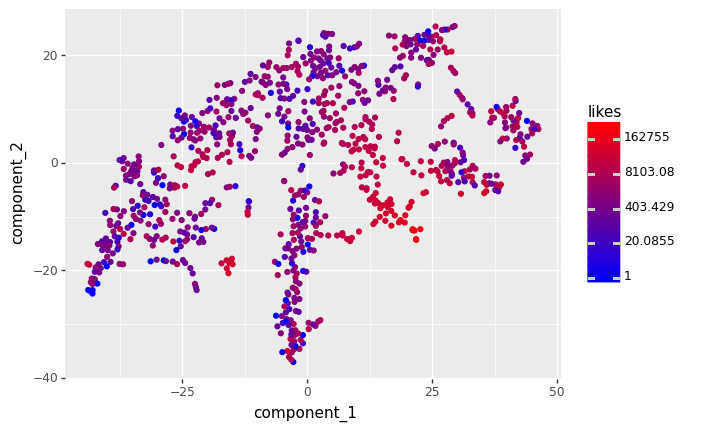

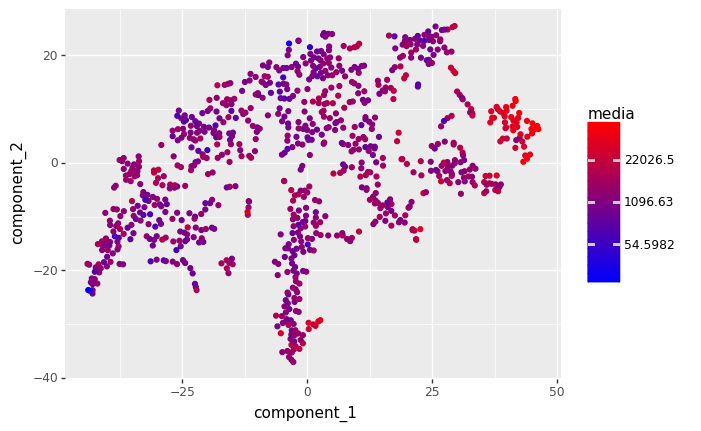

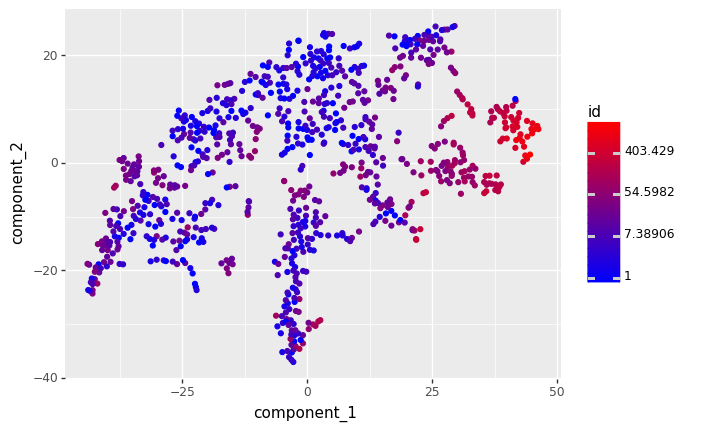

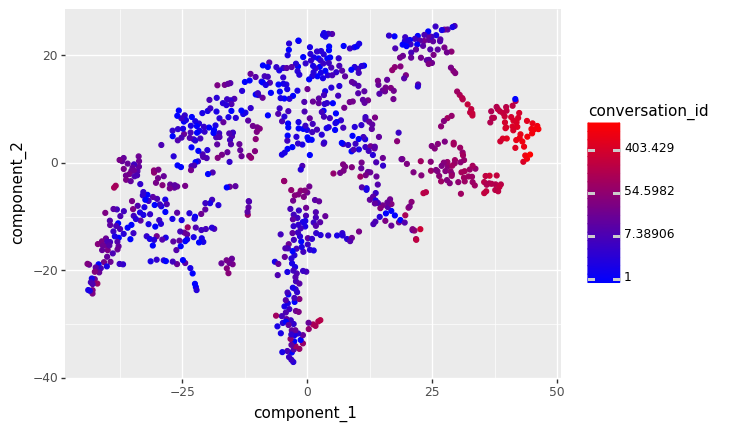

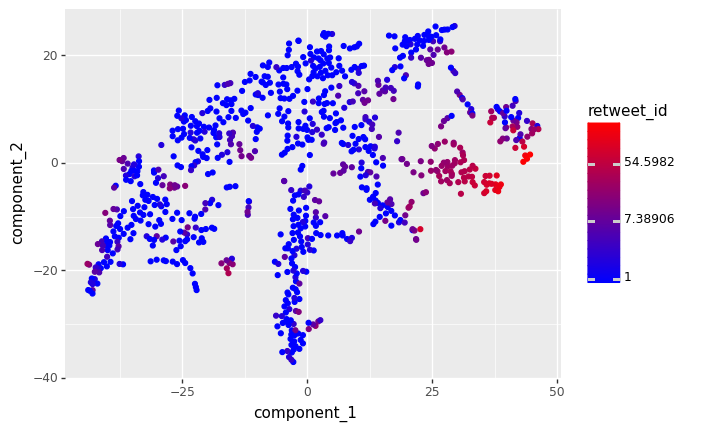

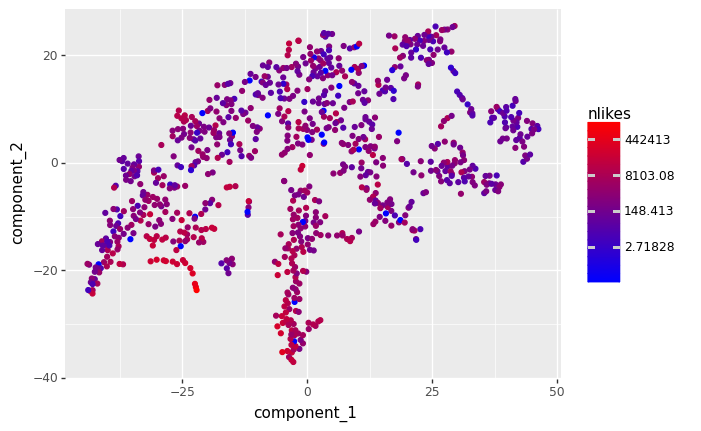

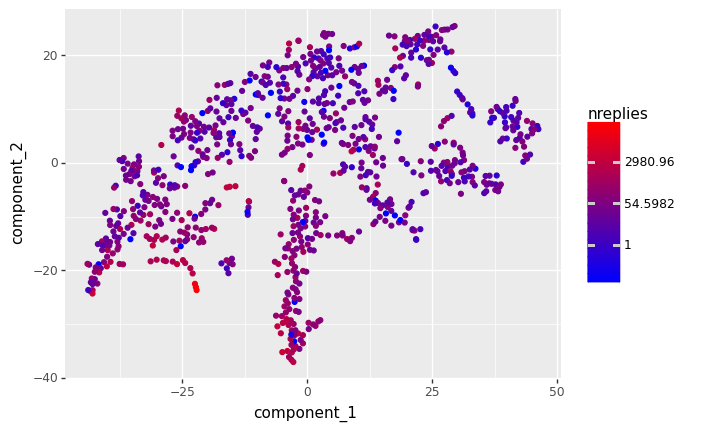

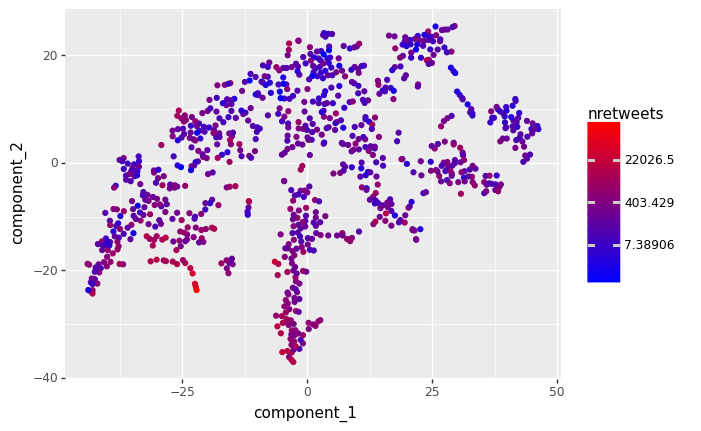

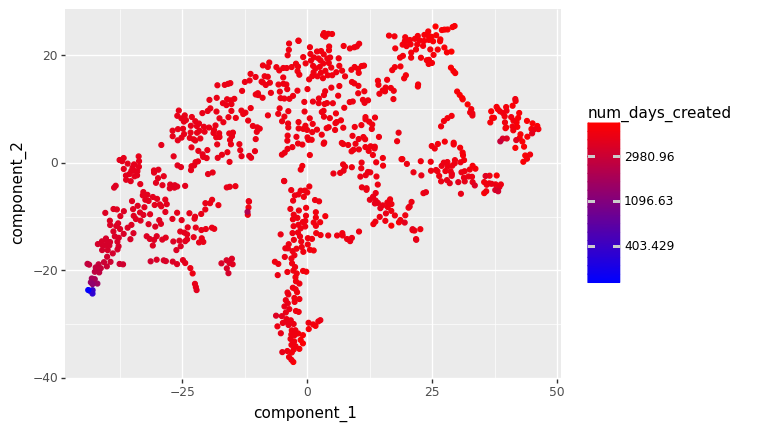

In [252]:
for variable in variables:
    graph = (
        pn.ggplot(transformed_data, pn.aes(x='component_1', y='component_2', color=variable))
        + pn.geom_point()
        + pn.scale_color_gradient(trans='log', low='blue', high='red')
    )

    graph.draw();

Si nos fijamos donde los colores son mas fuertes - vemos cosas como:

* La parte más de la derecha corresponde con los que tienen más tweets - bastante similar a lo que vimos antes
* De abajo arriba vemos una tendencia de más a menos followers 
* Tambien vemos un cluster de likes y replies abajo a la izquierda

La clave en general es que ahora tenemos muchisimo más separación de nuestros datos - esto significa que el algoritmo ha sido mucho más capaz de separar lo que tenemos.

No hemos hablado de `UMAP` pero existe una implementación en `umap-learn` que adopta un sintaxis muy similar.

## Reducción de dimensiones: aplicando las tecnicas
Intentamos utilizar nuestros resultados - primero aplicamos un KMeans sobre los resultados del t-SNE para ver si hay algo interesante

In [256]:
X_variables = ['component_1', 'component_2']

kmeans_tsne_pipeline = Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('cluster', KMeans(n_clusters=5, random_state=0))
    ]
)

kmeans_tsne_pipeline.fit(transformed_data[X_variables])
predictions = kmeans_tsne_pipeline.predict(transformed_data[X_variables])
pd.DataFrame(predictions).value_counts()

1    193
0    183
2    175
3    167
4    129
dtype: int64

In [257]:
metrics.silhouette_score(kmeans_tsne_pipeline['scaler'].transform(transformed_data[X_variables]), predictions)

0.42820436

In [258]:
transformed_data['predictions_kmeans_5_scaler'] = predictions.astype(str)

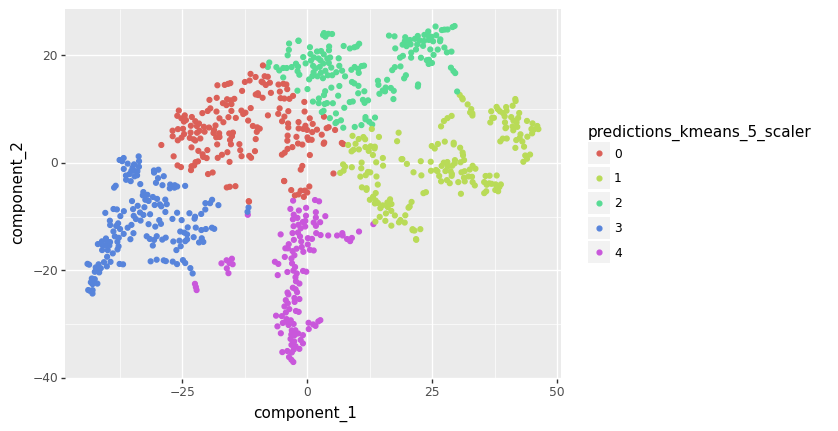

In [259]:
graph = (
    pn.ggplot(transformed_data, pn.aes(x='component_1', y='component_2', color='predictions_kmeans_5_scaler'))
    + pn.geom_point()
)

graph.draw();

Pues la verdad es que hemos producido un resultado muy bonito! Quizas es un poco obvio que iba a pasar porque estamos aplicando el agoritmo sobre un algoritmo cuyo trabajo es separar los puntos. Intentamos hacer el analisis que hicimos antes para ver si entendemos estos clusters...

In [245]:
cols = [col for col in transformed_data if col not in X_variables + ['predictions_kmeans_5_scaler']]
cols_reduced = ['followers', 'nlikes', 'nreplies', 'nretweets']

In [246]:
transformed_data.groupby('predictions_kmeans_5_scaler')[cols].mean()

,following,followers,likes,media,id,conversation_id,retweet_id,nlikes,nreplies,nretweets,num_days_created
predictions_kmeans_5_scaler,,,,,,,,,,,
0,6477.530055,4.845500e+06,2392.469945,2044.480874,10.000000,9.180328,1.180328,2672.158102,110.009554,379.314231,4413.672131
1,5052.051813,6.248135e+06,23235.948187,23343.963731,166.948187,153.911917,25.191710,985.947987,57.901250,298.096390,4688.683938
2,3984.937143,3.547025e+06,2627.194286,3300.262857,11.028571,10.125714,1.857143,1506.248541,61.205860,250.135943,4825.148571
3,16446.443114,6.528797e+06,2001.640719,2467.005988,14.473054,13.065868,2.377246,9763.588929,296.285658,1250.276857,3590.940120
4,42066.255814,2.884629e+07,6043.372093,4756.976744,16.922481,15.217054,2.689922,31973.734747,1838.100304,6240.522476,4566.713178


In [247]:
transformed_data.groupby('predictions_kmeans_5_scaler')[cols_reduced].mean()

,followers,nlikes,nreplies,nretweets
predictions_kmeans_5_scaler,,,,
0,4.845500e+06,2672.158102,110.009554,379.314231
1,6.248135e+06,985.947987,57.901250,298.096390
2,3.547025e+06,1506.248541,61.205860,250.135943
3,6.528797e+06,9763.588929,296.285658,1250.276857
4,2.884629e+07,31973.734747,1838.100304,6240.522476


Parece que vemos unos patrones similares a antes:

* El grupo 1 tiene muchos seguidores y tweets pero poco likes de media etc.
* El grupo 4 son los que tienen mucho seguimiento en general - vemos en el grafico este grupo muy claro!
* Los 3 tienen mucha interaccion...

Vamos a probar a utilizar esto en nuestra regresion - pero ahora de 2 formas:

* Primero, con la proyeccion directa
* Segundo, con los clusters que hemos creado

In [291]:
from sklearn.linear_model import LinearRegression

X_variables = ['followers', 'video']
y_variable = 'nlikes'

In [292]:
cols_tweets = X_variables + ['id_user', y_variable]
cols_trans = ['id_user', 'predictions_kmeans_5_scaler', 'component_1', 'component_2']
combined_data = tweet_data[cols_tweets].merge(transformed_data[cols_trans], on='id_user')

In [293]:
tweet_data.shape

(40581, 56)

In [294]:
combined_data.shape

(40581, 7)

Primero el modelo original

In [284]:
model = LinearRegression()
model.fit(combined_data[X_variables], combined_data[y_variable])
model.score(combined_data[X_variables], combined_data[y_variable])

0.009980522620330223

Ahora con los clusters

In [295]:
model = LinearRegression()
model.fit(combined_data[X_variables + ['predictions_kmeans_5_scaler']], combined_data[y_variable])
model.score(combined_data[X_variables + ['predictions_kmeans_5_scaler']], combined_data[y_variable])

0.019964749646184776

Y ahora con los componentes

In [296]:
model = LinearRegression()
model.fit(combined_data[['component_1', 'component_2']], combined_data[y_variable])
model.score(combined_data[['component_1', 'component_2']], combined_data[y_variable])

0.018591427330212573

Y hemos mejorado nuestro resultado bastante! Fija que antes con el simple kmeans solo logramos una mejora ligera.

A lo mejor dices "pero podriamos haber simplemente incluido todas las variables del data set!" - y a lo mejor esto es cierto en nuestro caso - pero no siempre sera asi, especialmente si tenemos menos datos!